In [1]:
from generate_test_beam import generate_test_beam, generate_test_images

/global/common/software/m669/jpga/conda/envs/phase_space_reconstruction/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


tensor([-25.], device='cuda:0') tensor(167.9724, device='cuda:0', dtype=torch.float64)
tensor([-18.6842], device='cuda:0') tensor(100.4359, device='cuda:0', dtype=torch.float64)
tensor([-12.3684], device='cuda:0') tensor(51.0525, device='cuda:0', dtype=torch.float64)
tensor([-6.0526], device='cuda:0') tensor(18.7823, device='cuda:0', dtype=torch.float64)
tensor([0.2632], device='cuda:0') tensor(2.6273, device='cuda:0', dtype=torch.float64)
tensor([6.5789], device='cuda:0') tensor(1.6294, device='cuda:0', dtype=torch.float64)
tensor([12.8947], device='cuda:0') tensor(14.8691, device='cuda:0', dtype=torch.float64)


/global/common/software/m669/jpga/conda/envs/phase_space_reconstruction/lib/python3.10/site-packages/torch/functional.py:568: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  /opt/conda/conda-bld/pytorch_1646755897462/work/aten/src/ATen/native/TensorShape.cpp:2228.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


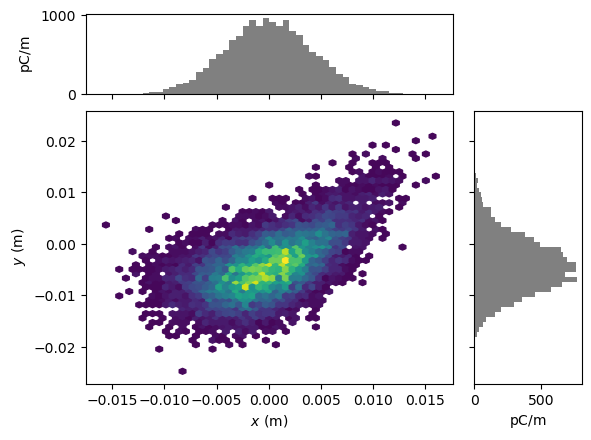

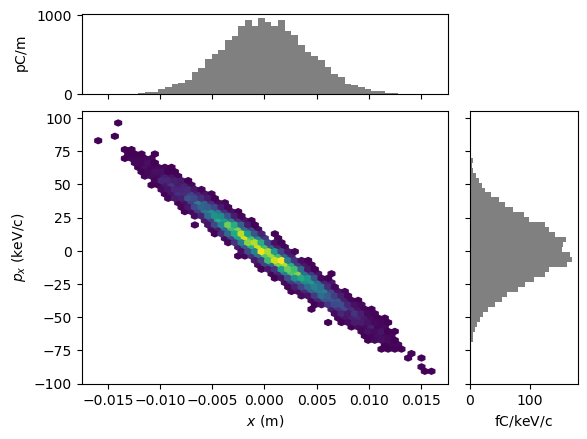

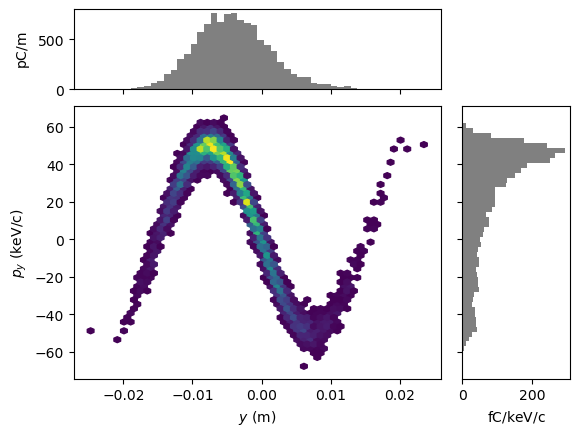

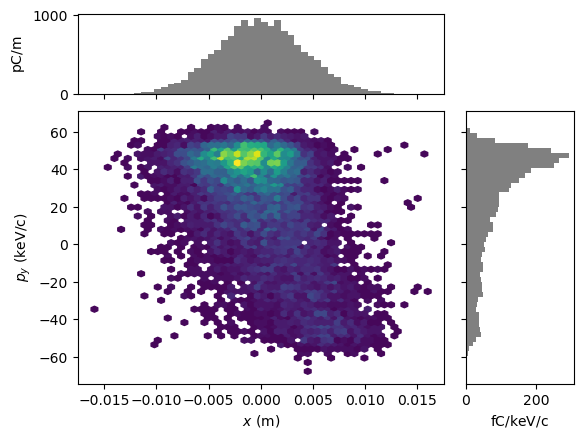

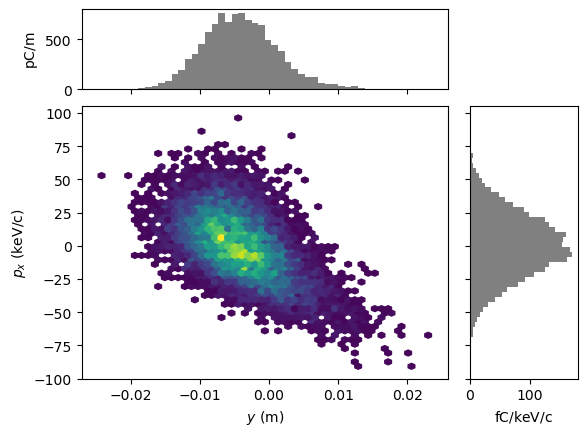

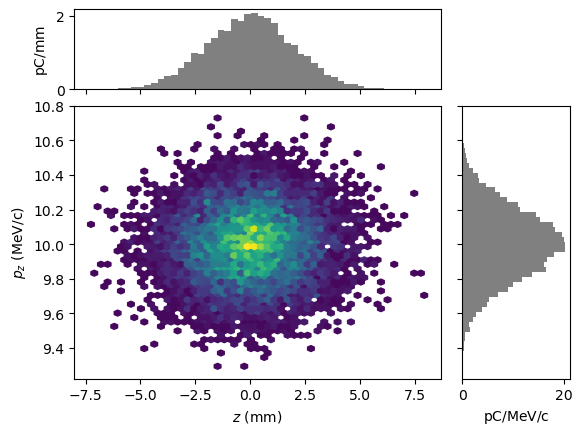

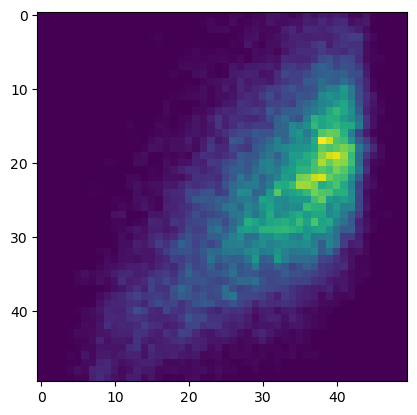

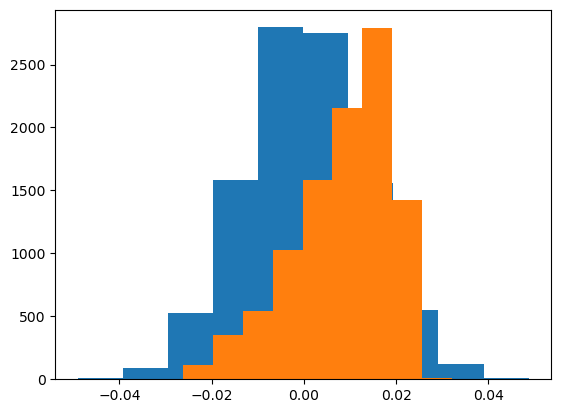

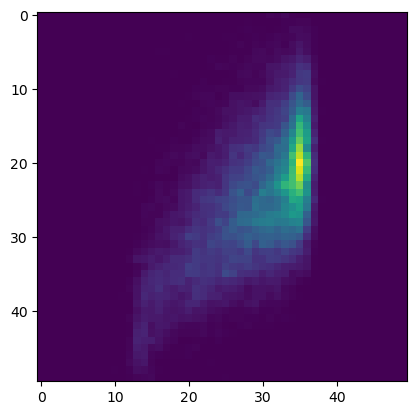

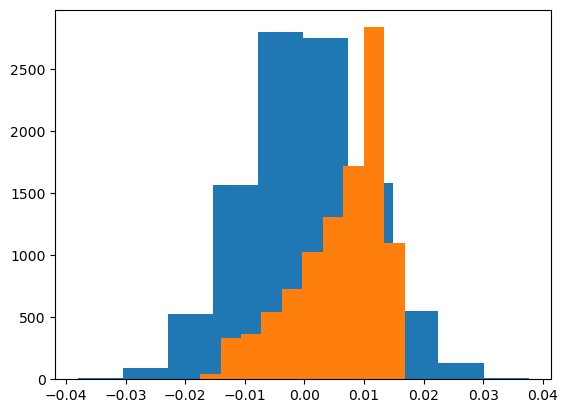

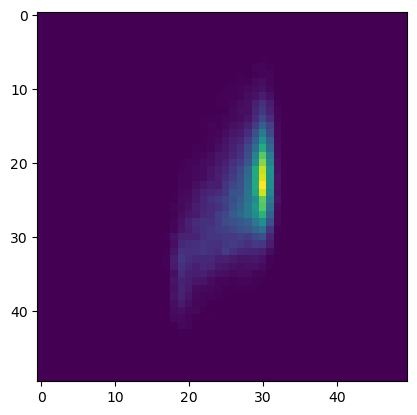

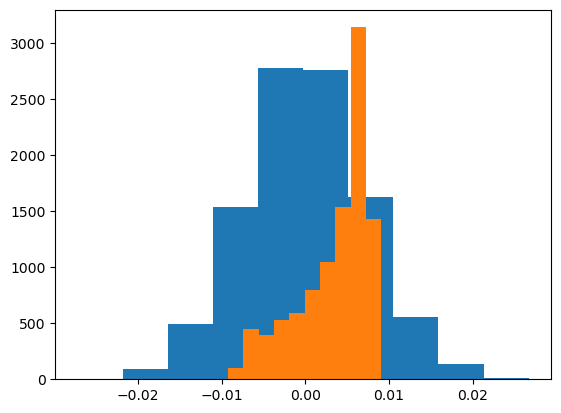

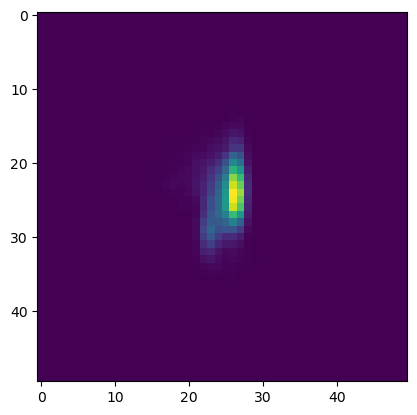

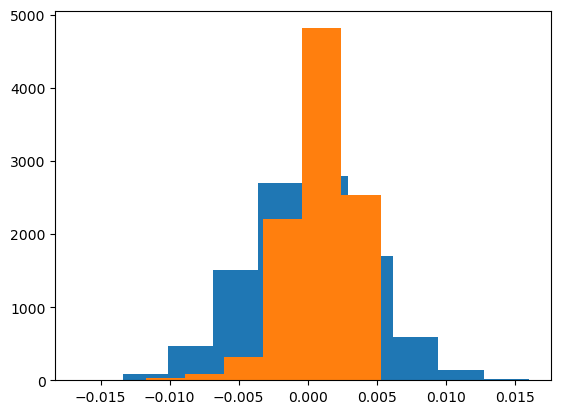

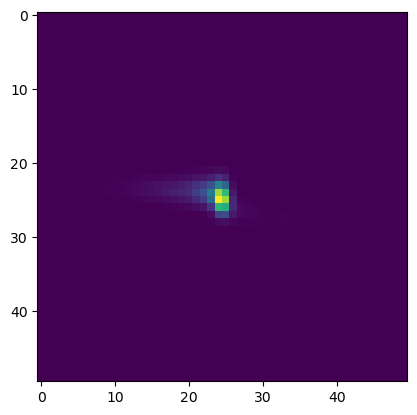

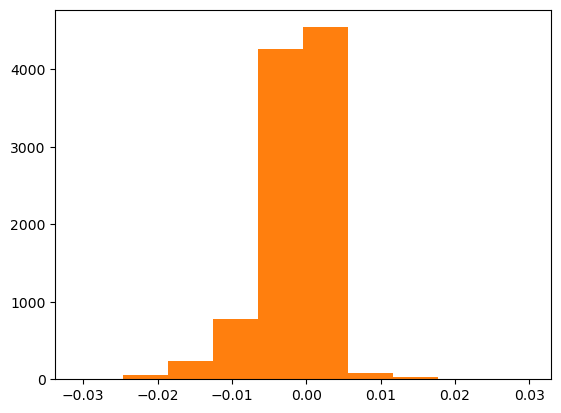

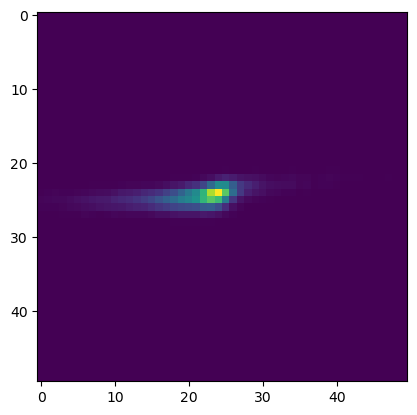

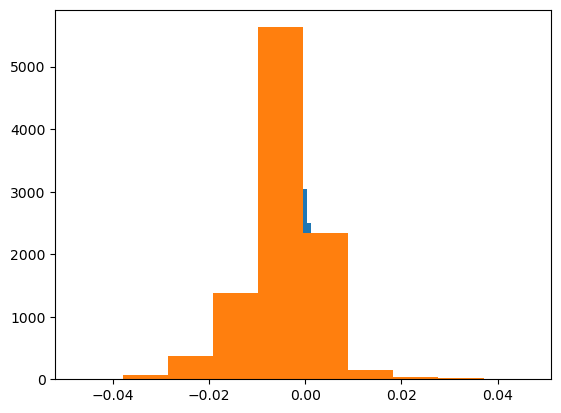

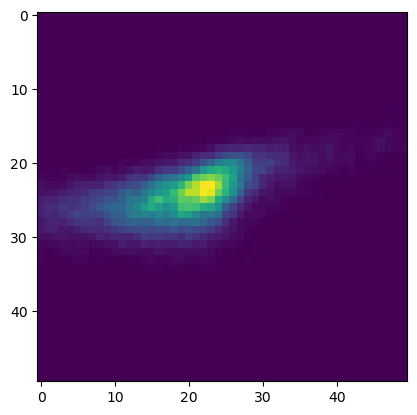

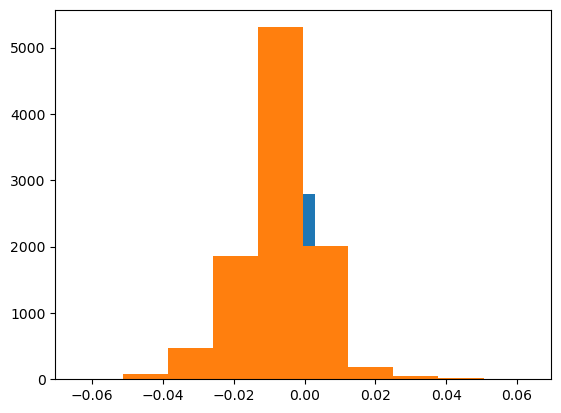

In [2]:
generate_test_images()

In [3]:
import torch
beam_coords = torch.load("ground_truth_dist.pt")
cov = torch.cov(beam_coords.T)

In [4]:
ycov = cov[2:4,2:4]
emit = torch.det(ycov).sqrt()
twiss = ycov / emit
print(f"emit {emit}")
print(f"beta {twiss[0,0]}")
print(f"alpha {-twiss[1,0]}")
print(f"gamma {twiss[1,1]}")

emit 1.1450761173869507e-05
beta 2.60463932928154
alpha 0.9827185638440237
gamma 0.7547055569747102


In [5]:
xcov = cov[:2,:2]
emit = torch.det(xcov).sqrt()
twiss = xcov / emit
print(f"emit {emit}")
print(f"beta {twiss[0,0]}")
print(f"alpha {-twiss[1,0]}")
print(f"gamma {twiss[1,1]}")

emit 2.0068111380311284e-06
beta 8.970350940786316
alpha 4.982357234298699
gamma 2.878804160576679


In [6]:
beam_coords.shape

torch.Size([10000, 6])

In [7]:
bins = torch.load("bins.pt")

In [8]:
bins[1]-bins[0]

tensor(0.0012)

(array([  18.,  163.,  676., 1743., 2609., 2600., 1510.,  559.,  110.,
          12.]),
 array([-0.07061542, -0.05625485, -0.04189428, -0.0275337 , -0.01317313,
         0.00118745,  0.01554802,  0.02990859,  0.04426917,  0.05862974,
         0.07299032]),
 <BarContainer object of 10 artists>)

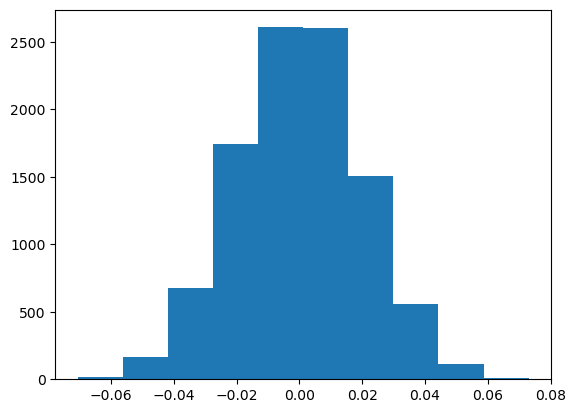

In [9]:
import matplotlib.pyplot as plt
plt.hist(beam_coords.T[-1].numpy())

In [11]:
from fitting import train_single_model

0 tensor(71089496., device='cuda:0', grad_fn=<MulBackward0>)
100 tensor(5700116., device='cuda:0', grad_fn=<MulBackward0>)
200 tensor(6144877.5000, device='cuda:0', grad_fn=<MulBackward0>)
300 tensor(4600018.5000, device='cuda:0', grad_fn=<MulBackward0>)
400 tensor(4857474.5000, device='cuda:0', grad_fn=<MulBackward0>)
500 tensor(4539986., device='cuda:0', grad_fn=<MulBackward0>)
600 tensor(3907806.7500, device='cuda:0', grad_fn=<MulBackward0>)
700 tensor(4280358.5000, device='cuda:0', grad_fn=<MulBackward0>)
800 tensor(4476005., device='cuda:0', grad_fn=<MulBackward0>)
900 tensor(3940703.2500, device='cuda:0', grad_fn=<MulBackward0>)


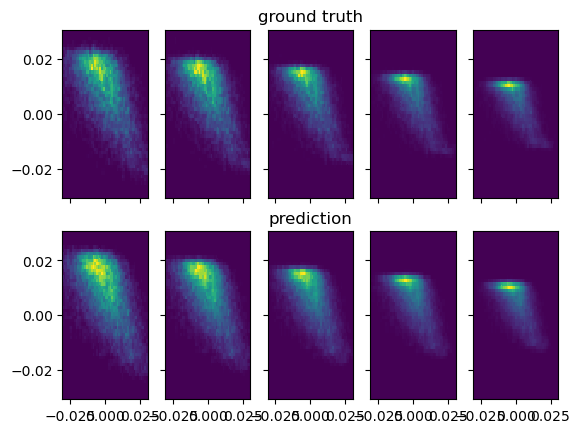

In [12]:
train_single_model()